In [1]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns

In [12]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', delimiter=',',
           names=['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 
                  'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
                  'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'])

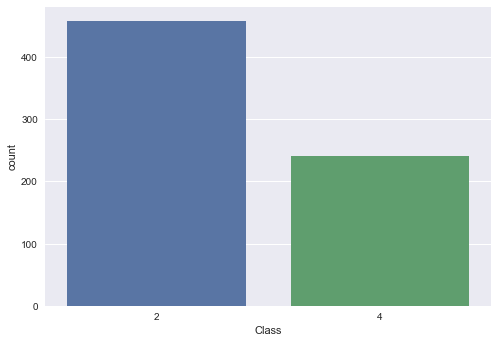

In [14]:
sns.countplot(df['Class'])
# 2 is benign
# 4 is malignant

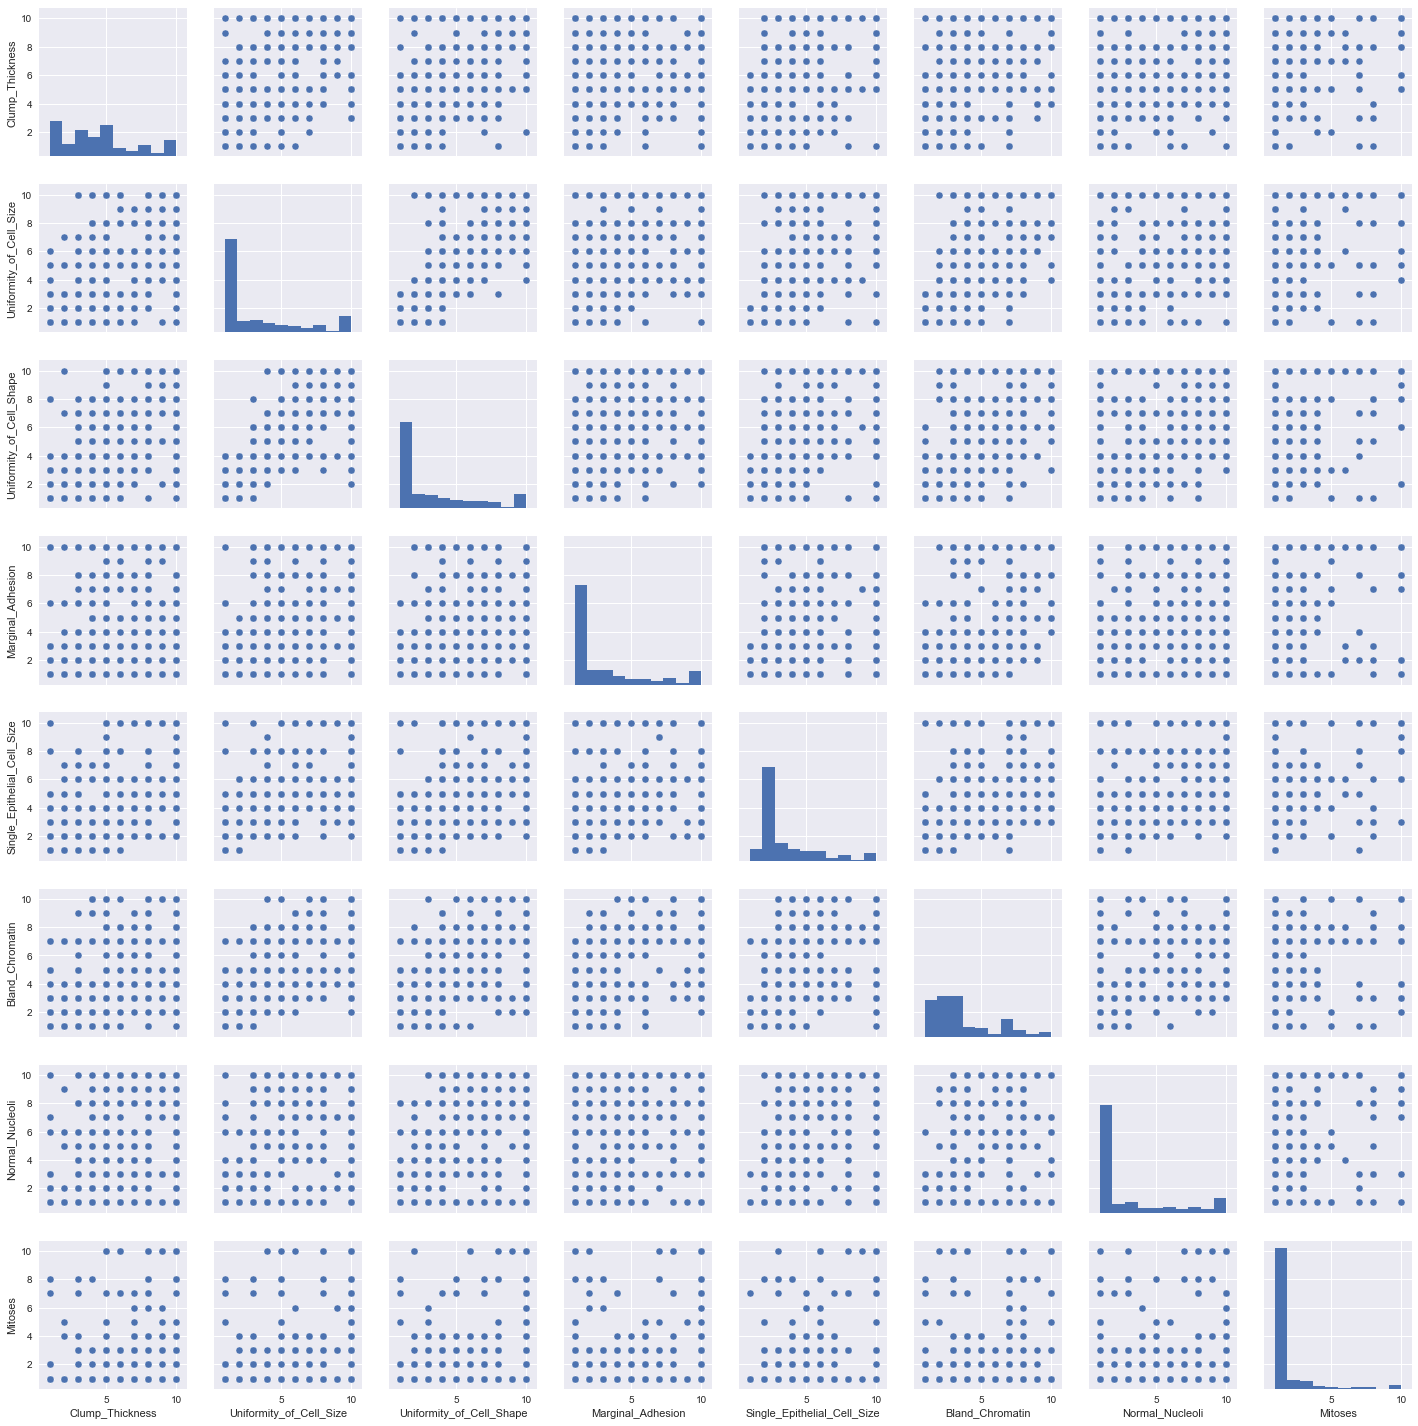

In [18]:
sns.pairplot(df.drop(['Class', 'Sample_code_number'], axis=1))

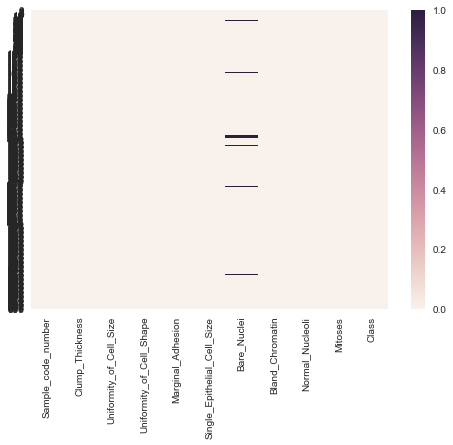

In [36]:
sns.heatmap(df.isin(['?']))

In [38]:
df = df[df.Bare_Nuclei != '?']

In [41]:
X = df.drop(['Class', 'Sample_code_number'], axis=1)
y = df.Class

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_reg = LogisticRegression()

In [53]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
y_pred = log_reg.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          2       0.94      0.98      0.96       127
          4       0.97      0.90      0.93        78

avg / total       0.95      0.95      0.95       205



In [61]:
print(confusion_matrix(y_test, y_pred))

[[125   2]
 [  8  70]]


In [58]:
from sklearn.svm import SVC

In [60]:
clf = SVC()

In [62]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
svc_y_pred = clf.predict(X_test)

In [66]:
print(classification_report(y_test, svc_y_pred))

             precision    recall  f1-score   support

          2       1.00      0.94      0.97       127
          4       0.92      1.00      0.96        78

avg / total       0.97      0.97      0.97       205



In [67]:
print(confusion_matrix(y_test, svc_y_pred))

[[120   7]
 [  0  78]]


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dtc = DecisionTreeClassifier(criterion='entropy')

In [70]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [71]:
dtc_y_pred = dtc.predict(X_test)

In [72]:
print(classification_report(y_test, dtc_y_pred))

             precision    recall  f1-score   support

          2       0.93      0.98      0.96       127
          4       0.97      0.88      0.93        78

avg / total       0.95      0.95      0.95       205



In [73]:
print(confusion_matrix(y_test, dtc_y_pred))

[[125   2]
 [  9  69]]


In [76]:
feat_importance = dtc.feature_importances_

In [75]:
X.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses'],
      dtype='object')

In [84]:
feature_imp = pd.DataFrame(feat_importance, X.columns)

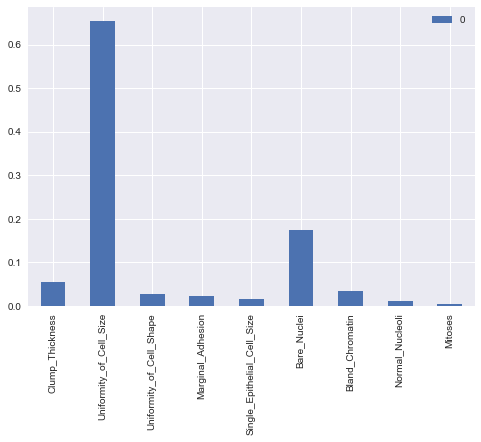

In [85]:
feature_imp.plot.bar()